In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
studperf=pd.read_csv('StudentsPerformance.csv')
studperf.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,NaN,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,NaN,standard,completed,88,95,92
7,male,group B,NaN,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
studperf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    774 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
mathscore                      1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
studperf.drop(['lunch','test preparation course'],axis=1,inplace=False)
studperf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,NaN,standard,none,76,78,75


In [6]:
studperf['parental level of education']=studperf['parental level of education'].fillna("High School")
studperf.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,High School,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,High School,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,High School,standard,completed,88,95,92
7,male,group B,High School,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [7]:
studperf['race/ethnicity']=studperf['race/ethnicity'].map({
    'group A':'Asian',
    'group B':'African',
    'group C':'Afro-Asian',
    'group D':'American',
    'group E':'European',
})
studperf.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,African,bachelor's degree,standard,none,72,72,74
1,female,Afro-Asian,High School,standard,completed,69,90,88
2,female,African,master's degree,standard,none,90,95,93
3,male,Asian,associate's degree,free/reduced,none,47,57,44
4,male,Afro-Asian,High School,standard,none,76,78,75
5,female,African,associate's degree,standard,none,71,83,78
6,female,African,High School,standard,completed,88,95,92
7,male,African,High School,free/reduced,none,40,43,39
8,male,American,high school,free/reduced,completed,64,64,67
9,female,African,high school,free/reduced,none,38,60,50


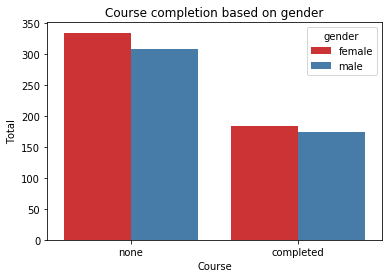

In [18]:
ax=sns.countplot(x='test preparation course', hue="gender", palette='Set1', data=studperf)
ax.set(title='Course completion based on gender', xlabel='Course', ylabel='Total')
plt.show()

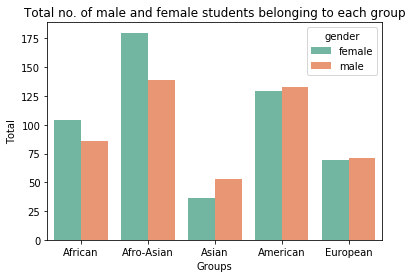

In [20]:
ax=sns.countplot(x='race/ethnicity', hue='gender', palette='Set2', data=studperf)
ax.set(title='Total no. of male and female students belonging to each group', xlabel='Groups', ylabel='Total')
plt.show()

In [21]:
interval=(0,40,50,60,75)
categories=["Fail","2ndClass","1stClass","Distinction"]

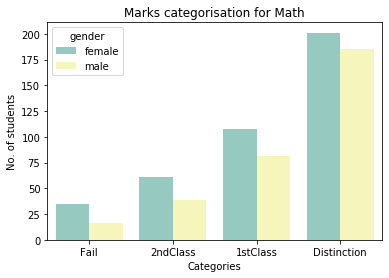

In [24]:
studperf["Marks_cats"]=pd.cut(studperf.mathscore,interval,labels=categories)
ax=sns.countplot(x="Marks_cats", hue="gender", palette='Set3', data=studperf)
ax.set(title='Marks categorisation for Math', xlabel='Categories', ylabel='No. of students')
plt.show()

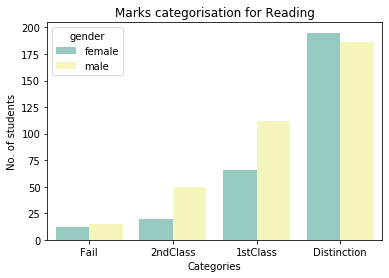

In [33]:
studperf["Marks_cats"]=pd.cut(studperf['reading score'],interval,labels=categories)
ax=sns.countplot(x="Marks_cats", hue="gender", palette='Set3', data=studperf)
ax.set(title='Marks categorisation for Reading', xlabel='Categories', ylabel='No. of students')
plt.show()

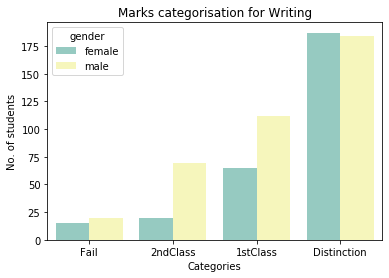

In [34]:
studperf["Marks_cats"]=pd.cut(studperf['writing score'],interval,labels=categories)
ax=sns.countplot(x="Marks_cats", hue="gender", palette='Set3', data=studperf)
ax.set(title='Marks categorisation for Writing', xlabel='Categories', ylabel='No. of students')
plt.show()

In [37]:
studperf.groupby('race/ethnicity').mean()

,mathscore,reading score,writing score
race/ethnicity,,,
African,63.452632,67.352632,65.600000
Afro-Asian,64.282132,69.103448,67.827586
American,67.362595,70.030534,70.145038
Asian,61.629213,64.674157,62.674157
European,73.378571,73.028571,71.407143
